In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [2]:
diabetes=pd.read_csv('diabetes.csv')

In [3]:
diabetes.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
252,2,90,80,14,55,24.4,0.249,24,0
139,5,105,72,29,325,36.9,0.159,28,0
376,0,98,82,15,84,25.2,0.299,22,0
77,5,95,72,33,0,37.7,0.370,27,0
607,1,92,62,25,41,19.5,0.482,25,0


In [4]:
rf = RandomOverSampler(random_state=42, sampling_strategy=1.0)
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
X_res, y_res = rf.fit_resample(X, y)
diabetes = pd.concat([X_res, y_res], axis=1)


In [5]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes1 = diabetes.drop("Outcome", axis=1)

In [8]:
print(diabetes1.describe())

       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  1000.000000  1000.000000    1000.000000    1000.000000  1000.000000   
mean      4.115000   125.374000      69.576000      20.832000    85.494000   
std       3.509714    32.341399      19.782304      16.299677   121.252093   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000   102.000000      64.000000       0.000000     0.000000   
50%       3.000000   122.000000      72.000000      24.000000    23.000000   
75%       7.000000   146.000000      80.000000      33.000000   140.000000   
max      17.000000   199.000000     122.000000      99.000000   846.000000   

              BMI  DiabetesPedigreeFunction          Age  
count  1000.00000               1000.000000  1000.000000  
mean     32.59690                  0.482551    34.155000  
std       7.76833                  0.339166    11.602223  
min       0.00000                  0.078000    21.000000  
25

In [9]:
Q1=diabetes1.quantile(0.25)
Q3=diabetes1.quantile(0.75)

In [10]:
Q1

Pregnancies                   1.000
Glucose                     102.000
BloodPressure                64.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          27.900
DiabetesPedigreeFunction      0.247
Age                          25.000
Name: 0.25, dtype: float64

In [11]:
Q3

Pregnancies                   7.00000
Glucose                     146.00000
BloodPressure                80.00000
SkinThickness                33.00000
Insulin                     140.00000
BMI                          36.80000
DiabetesPedigreeFunction      0.64525
Age                          42.00000
Name: 0.75, dtype: float64

In [12]:
IQR=Q3-Q1

In [13]:
IQR

Pregnancies                   6.00000
Glucose                      44.00000
BloodPressure                16.00000
SkinThickness                33.00000
Insulin                     140.00000
BMI                           8.90000
DiabetesPedigreeFunction      0.39825
Age                          17.00000
dtype: float64

In [14]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit

Pregnancies                  -8.000000
Glucose                      36.000000
BloodPressure                40.000000
SkinThickness               -49.500000
Insulin                    -210.000000
BMI                          14.550000
DiabetesPedigreeFunction     -0.350375
Age                          -0.500000
dtype: float64

In [15]:
upper_limit

Pregnancies                  16.000000
Glucose                     212.000000
BloodPressure               104.000000
SkinThickness                82.500000
Insulin                     350.000000
BMI                          50.150000
DiabetesPedigreeFunction      1.242625
Age                          67.500000
dtype: float64

In [16]:
for col in diabetes1:
  outliers = diabetes1[(diabetes1[col] < lower_limit[col]) | (diabetes1[col] > upper_limit[col])]

In [17]:
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
123,5,132,80,0,0,26.8,0.186,69
453,2,119,0,0,0,19.6,0.832,72
459,9,134,74,33,60,25.9,0.460,81
666,4,145,82,18,0,32.5,0.235,70
674,8,91,82,0,0,35.6,0.587,68
684,5,136,82,0,0,0.0,0.640,69


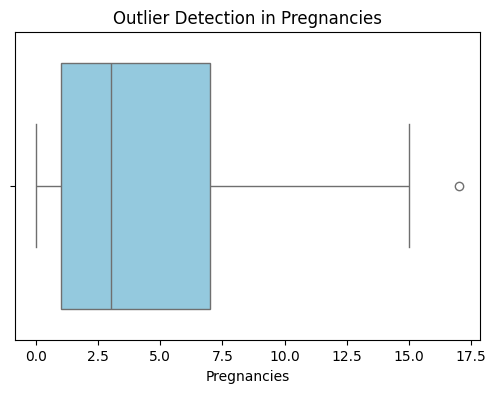

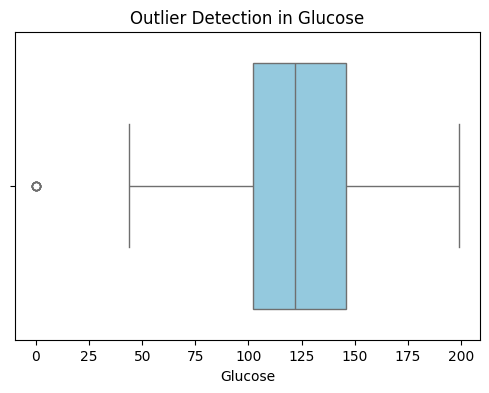

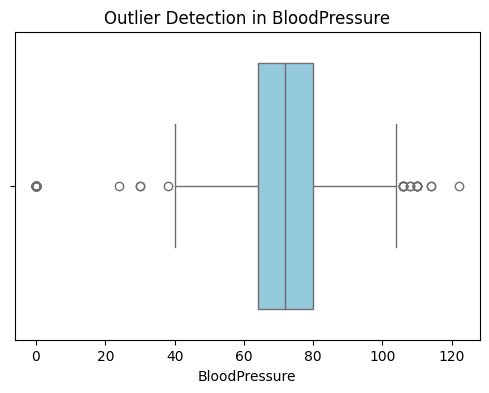

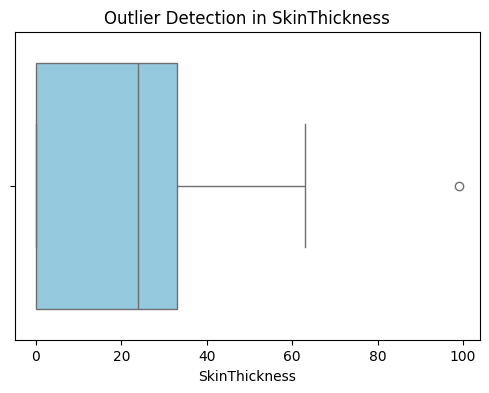

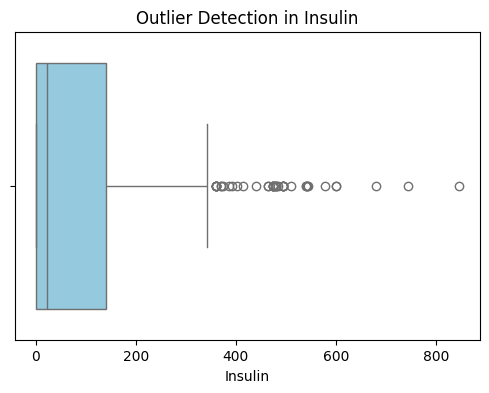

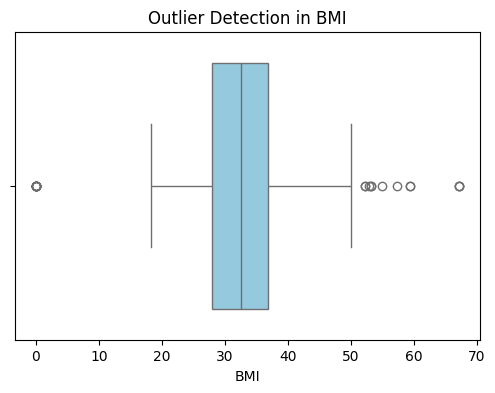

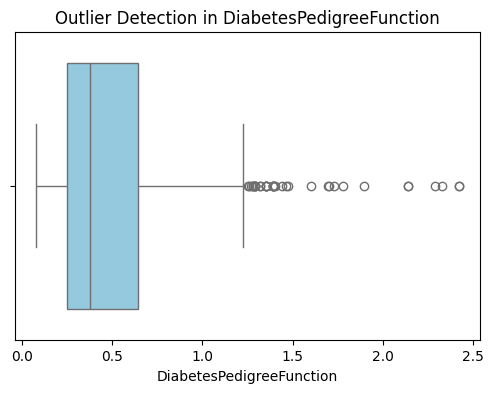

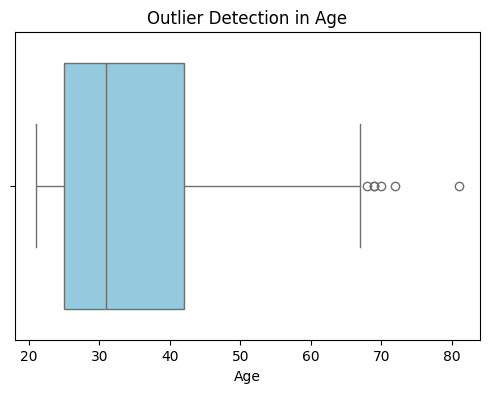

In [18]:
for col in diabetes1:
          plt.figure(figsize=(6,4))
          sns.boxplot(x=diabetes1[col], color='skyblue')
          plt.title(f"Outlier Detection in {col}")
          plt.show()

/tmp/ipykernel_13304/2807747172.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabetes, palette='Set2')


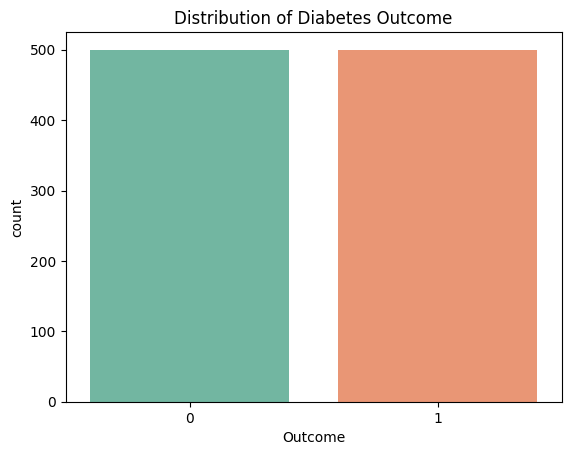

In [19]:
sns.countplot(x='Outcome', data=diabetes, palette='Set2')
plt.title("Distribution of Diabetes Outcome")
plt.show()

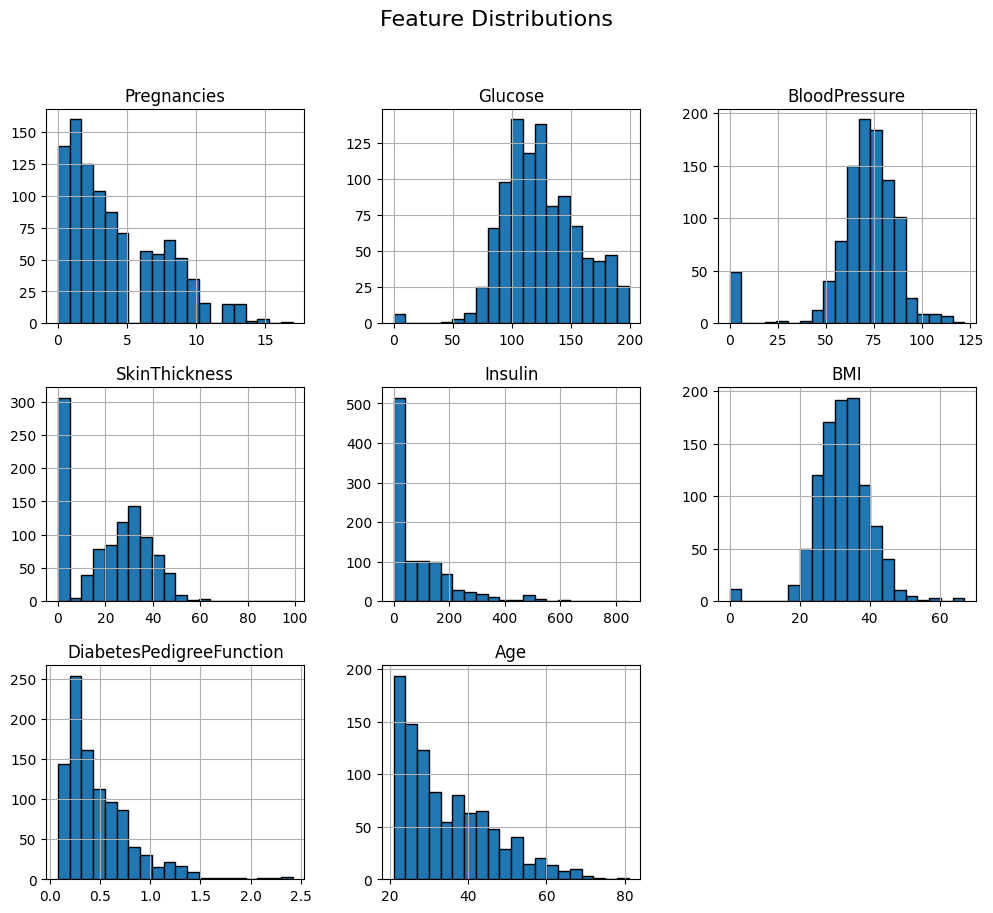

In [20]:
diabetes.drop(columns=['Outcome']).hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [21]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129423,0.150038,-0.086556,-0.044390,-0.024013,0.021329,0.538675,0.232899
Glucose,0.129423,1.000000,0.134917,0.059569,0.317766,0.211960,0.122844,0.252318,0.476223
BloodPressure,0.150038,0.134917,1.000000,0.235357,0.106501,0.259799,0.071718,0.237921,0.070401
SkinThickness,-0.086556,0.059569,0.235357,1.000000,0.464403,0.393587,0.210925,-0.126300,0.071694
Insulin,-0.044390,0.317766,0.106501,0.464403,1.000000,0.176678,0.163440,-0.018296,0.137815
BMI,-0.024013,0.211960,0.259799,0.393587,0.176678,1.000000,0.135834,0.008761,0.295282
DiabetesPedigreeFunction,0.021329,0.122844,0.071718,0.210925,0.163440,0.135834,1.000000,0.056728,0.155804
Age,0.538675,0.252318,0.237921,-0.126300,-0.018296,0.008761,0.056728,1.000000,0.255682
Outcome,0.232899,0.476223,0.070401,0.071694,0.137815,0.295282,0.155804,0.255682,1.000000


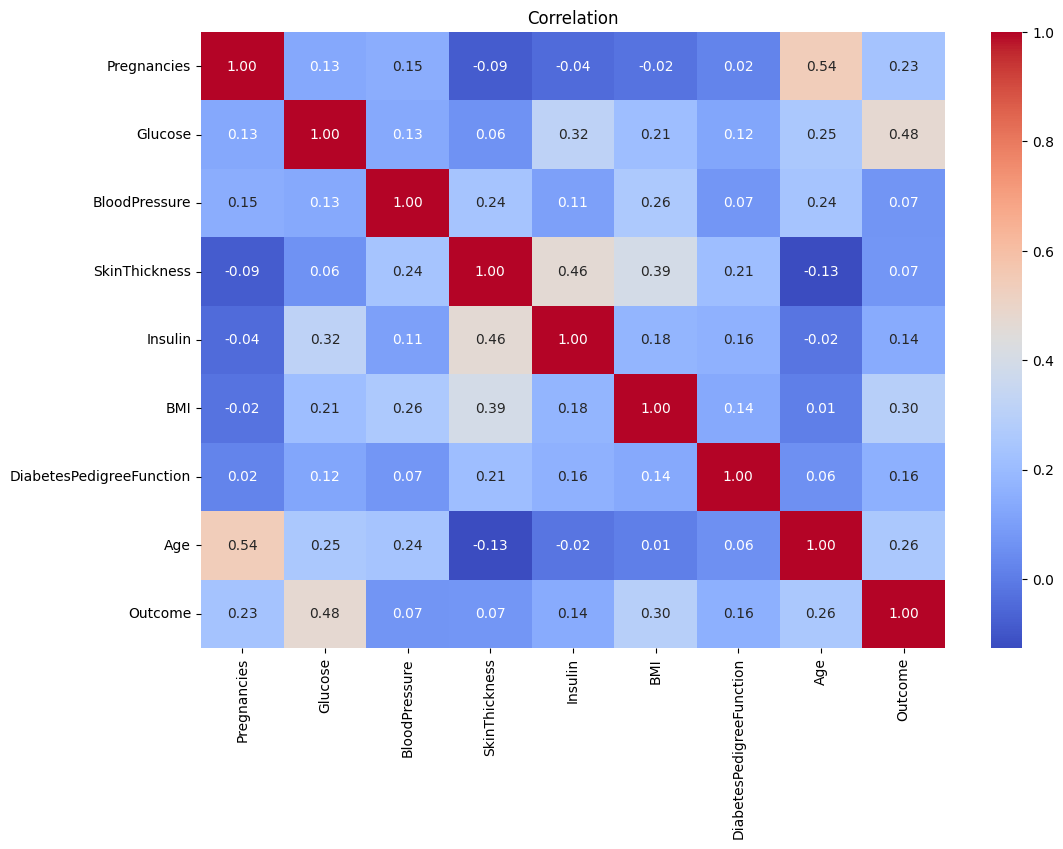

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation")
plt.show()

In [23]:
X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
model = SVC(random_state=42, kernel='rbf')
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7900


In [29]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Confusion Matrix:
 [[72 27]
 [15 86]]


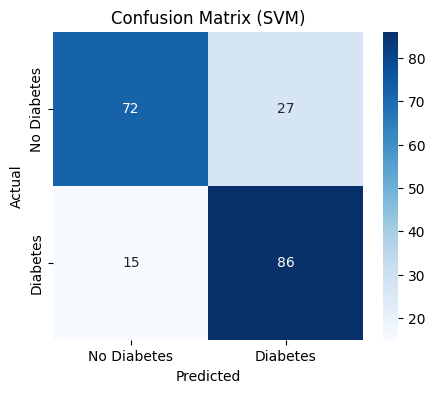

In [30]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()

In [31]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.77        99
           1       0.76      0.85      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200

